# Breast cancer detection (using CNN)

In [1]:
import os

os.getcwd()

'D:\\MyLearnings\\BreastCancer'

In [10]:
!pip install pathlib

In [2]:
# seperating benign and malign images as windowpath list
from pathlib import Path

input_dir = Path("./BreastCancerImageDataset")

benign = list(input_dir.rglob("*class0.png"))

malign = list(input_dir.rglob("*class1.png"))


In [48]:
# converting windowpath to string
str(benign[0])

'BreastCancerImageDataset\\10253\\0\\10253_idx5_x1001_y1001_class0.png'

### Creating structure to store the image as training, validation, and testing

In [3]:
parent_img_folder = os.path.join("./images")
# os.mkdir(parent_img_folder)


In [4]:
train_path = os.path.join("./images/train")
# os.mkdir(train_path)

validation_path = os.path.join("./images/validation")
# os.mkdir(validation_path)

test_path = os.path.join("./images/test")
# os.mkdir(test_path)

In [5]:
train_path_benign = os.path.join("./images/train/benign")
# os.mkdir(train_path_benign)

train_path_malign = os.path.join("./images/train/malign")
# os.mkdir(train_path_malign)

validation_path_benign = os.path.join("./images/validation/benign")
# os.mkdir(validation_path_benign)

validation_path_malign = os.path.join("./images/validation/malign")
# os.mkdir(validation_path_malign)

test_path_benign = os.path.join("./images/test/benign")
# os.mkdir(test_path_benign)

test_path_malign = os.path.join("./images/test/malign")
# os.mkdir(test_path_malign)

### creating list of needed numbers of data

In [6]:
import shutil

In [11]:
print(len(benign), len(malign))

397476 157572


In [7]:
benign_dataset_train = benign[:1000]
malign_dataset_train = malign[:1000]

print(len(benign_dataset_train), len(malign_dataset_train))

1000 1000


In [8]:
benign_dataset_validation = benign[10000:10250]  
malign_dataset_validation = malign[10000:10250]  

In [9]:
benign_dataset_test = benign[20000:20400]  
malign_dataset_test = malign[20000:20400]  

### copy the training, validation, and testing data

In [68]:
# creating train -> benign
# for img in benign_dataset_train:
#     shutil.copy(str(img), train_path_benign)

In [69]:
# creating train -> malign
# for img in malign_dataset_train:
#     shutil.copy(str(img), train_path_malign)

In [72]:
# creating validation -> benign
# for img in benign_dataset_validation:
#     shutil.copy(str(img), validation_path_benign)

In [73]:
# creating validation -> malign
# for img in malign_dataset_validation:
#     shutil.copy(str(img), validation_path_malign)

In [74]:
# creating test -> benign
# for img in benign_dataset_test:
#     shutil.copy(str(img), test_path_benign)

In [75]:
# creating test -> malign
# for img in malign_dataset_test:
#     shutil.copy(str(img), test_path_malign)

### figure of some data

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

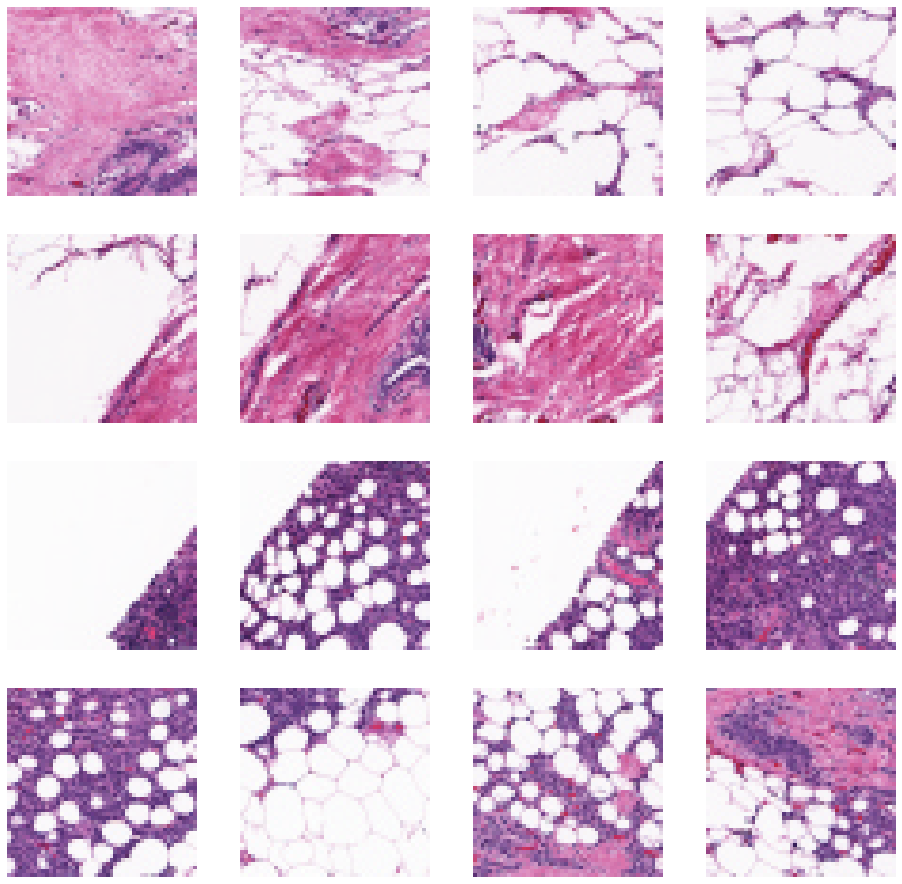

In [11]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_benign_img = benign_dataset_train[pic_index-8: pic_index]
next_malign_img = malign_dataset_train[pic_index-8:pic_index]

for i, img_path in enumerate(next_benign_img + next_malign_img):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)
    

plt.show()



## Creating model

In [13]:
!pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-uninstall-3qco5bct\\pip.exe'
Consider using the `--user` option or check the permissions.



In [14]:
# Anything above 2.10 is not supported on the GPU on Windows Native
!pip install "tensorflow<2.11" 

     -------------------------------------- 455.9/455.9 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 7.1 MB/s eta 0:00:00
     -------------------------------------- 182.

## Creating model

In [15]:
import tensorflow as tf

In [98]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(50, 50, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(128),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3872)              0         
                                                                 
 dense_4 (Dense)             (None, 512)              

In [99]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
#               optimizer = "adam",
              metrics=['accuracy'])

In [100]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
#     rotation_range = 40,
#     width_shift_range = 0.2,
#     height_shift_range = 0.2,
#     shear_range = 0.2,
#     zoom_range = 0.2,
#     horizontal_flip = True,
#     fill_mode = "nearest"
        
)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (50, 50),
    batch_size = 32,
    class_mode = "binary"
 )

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size = (50, 50),
    batch_size = 32,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [101]:
history = model.fit(
    train_generator,
    steps_per_epoch = 62,
    epochs = 15,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 16
)

Epoch 1/15
62/62 [==============================] - 3s 44ms/step - loss: 0.6600 - accuracy: 0.6738 - val_loss: 0.5946 - val_accuracy: 0.6780
Epoch 2/15
62/62 [==============================] - 3s 42ms/step - loss: 0.4929 - accuracy: 0.7622 - val_loss: 0.5975 - val_accuracy: 0.7180
Epoch 3/15
62/62 [==============================] - 3s 42ms/step - loss: 0.4728 - accuracy: 0.7912 - val_loss: 0.5008 - val_accuracy: 0.7440
Epoch 4/15
62/62 [==============================] - 3s 42ms/step - loss: 0.4379 - accuracy: 0.8013 - val_loss: 0.4444 - val_accuracy: 0.7920
Epoch 5/15
62/62 [==============================] - 3s 43ms/step - loss: 0.3977 - accuracy: 0.8313 - val_loss: 0.5590 - val_accuracy: 0.7560
Epoch 6/15
62/62 [==============================] - 3s 43ms/step - loss: 0.3743 - accuracy: 0.8430 - val_loss: 0.4501 - val_accuracy: 0.7960
Epoch 7/15
62/62 [==============================] - 3s 51ms/step - loss: 0.3401 - accuracy: 0.8577 - val_loss: 0.5048 - val_accuracy: 0.8040
Epoch 8/15
62

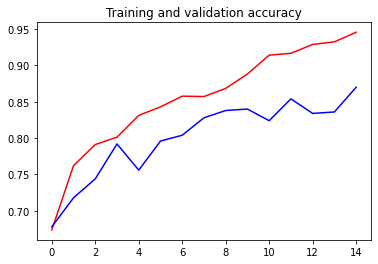

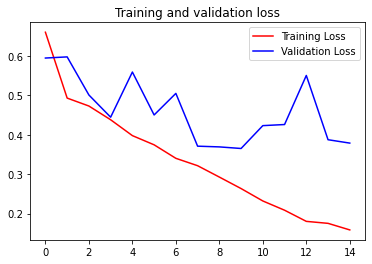

In [103]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

1/1 [==============================] - 1s 537ms/step


C:\Users\Admin\AppData\Local\Temp/ipykernel_9592/2358269721.py:50: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


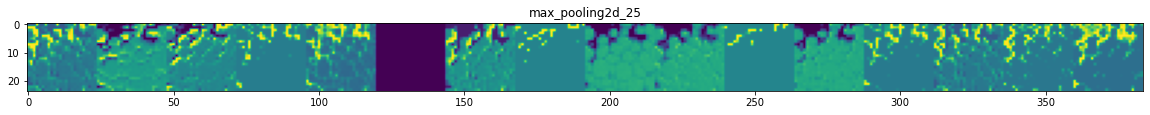

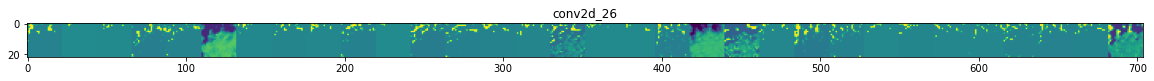

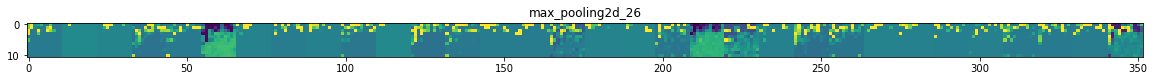

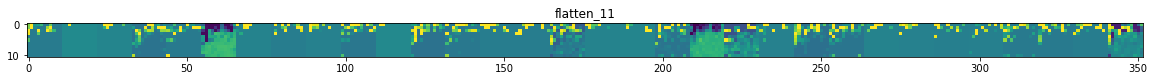

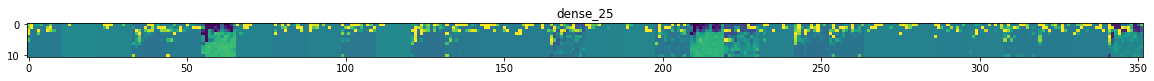

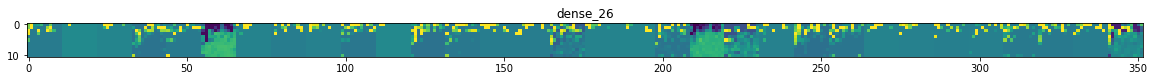

In [106]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
next_benign_img = benign_dataset_train[pic_index-8: pic_index]
next_malign_img = malign_dataset_train[pic_index-8:pic_index]

# next_benign_img = benign_dataset_train[pic_index-8: pic_index]
# next_malign_img = malign_dataset_train[pic_index-8:pic_index]


img_path = random.choice(next_benign_img + next_malign_img)

img = load_img(img_path, target_size=(50, 50))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
    
    # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Model Prediction

In [108]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (50, 50),
    batch_size = 32,
    class_mode = "binary"
 )

[WindowsPath('BreastCancerImageDataset/10285/0/10285_idx5_x1551_y1101_class0.png'),
 WindowsPath('BreastCancerImageDataset/10285/0/10285_idx5_x1551_y1151_class0.png'),
 WindowsPath('BreastCancerImageDataset/10285/0/10285_idx5_x1551_y1201_class0.png'),
 WindowsPath('BreastCancerImageDataset/10285/0/10285_idx5_x1551_y1251_class0.png'),
 WindowsPath('BreastCancerImageDataset/10285/0/10285_idx5_x1551_y1301_class0.png'),
 WindowsPath('BreastCancerImageDataset/10285/0/10285_idx5_x1551_y1351_class0.png'),
 WindowsPath('BreastCancerImageDataset/10285/0/10285_idx5_x1551_y1401_class0.png'),
 WindowsPath('BreastCancerImageDataset/10285/0/10285_idx5_x1551_y1451_class0.png'),
 WindowsPath('BreastCancerImageDataset/10285/0/10285_idx5_x1551_y1501_class0.png'),
 WindowsPath('BreastCancerImageDataset/10285/0/10285_idx5_x1551_y151_class0.png'),
 WindowsPath('BreastCancerImageDataset/10285/0/10285_idx5_x1551_y201_class0.png'),
 WindowsPath('BreastCancerImageDataset/10285/0/10285_idx5_x1551_y2151_class0.p

In [109]:
model.save("./model1")

INFO:tensorflow:Assets written to: ./model1\assets


INFO:tensorflow:Assets written to: ./model1\assets
